In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error
np.random.seed(29)

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

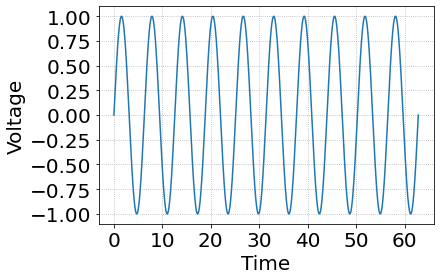

In [2]:
plt.grid(linestyle='dotted')
t = np.linspace(0,20*pi,10000)
x = np.sin(t)
plt.plot(t, x)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Voltage', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_input.png", dpi = 300, bbox_inches='tight')

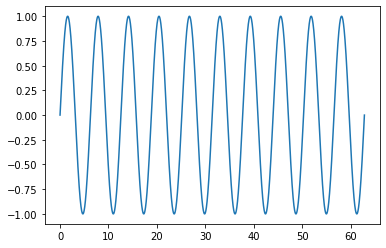

In [3]:
plt.plot(t,x)

In [4]:
dx = fd._differentiate(x, t)

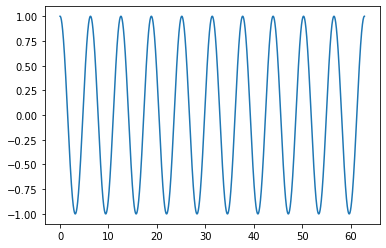

In [5]:
plt.plot(t,dx)

In [6]:
mdx = np.abs(dx)

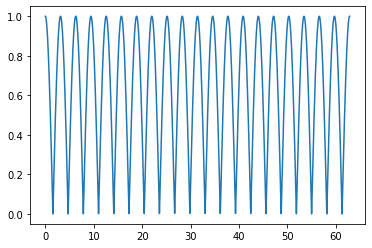

In [7]:
plt.plot(t, mdx)

In [8]:
def model(y, t):
    dydt = np.cos(t) - 0.5*np.abs(np.cos(t))*y - 2*np.cos(t)*np.abs(y)
    return dydt

In [9]:
y0 = 0
y = odeint(model, y0, t)

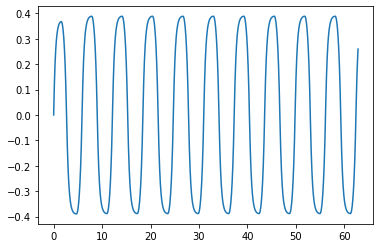

In [10]:
plt.plot(t,y)

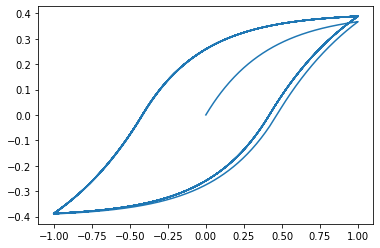

In [11]:
plt.plot(x, y)

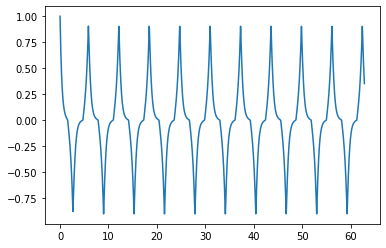

In [12]:
dy = fd._differentiate(y, t)
plt.plot(t, dy)

In [13]:
my = np.abs(y)
my = my.reshape(-1,)

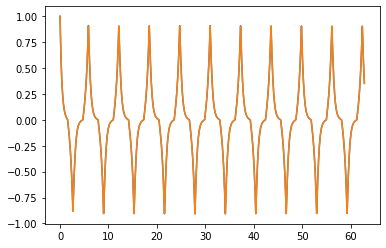

In [14]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = dx
t2 = mdx*y
t3 = dx*my
terms = t1-0.5*t2-2*t3
plt.plot(t,terms)
plt.plot(t, dy)

In [15]:
X = np.stack((y, x, dx, mdx, my), axis=-1)

In [16]:
model = ps.SINDy()
model.fit(X,t)
model.print()

(x0)' = 1.000 x2 + -0.500 x0 x3 + -2.000 x2 x4
(x1)' = 1.000 x2
(x2)' = -1.000 x1
(x3)' = -7070.300 1 + -16.165 x0 + 7.126 x1 + 11.898 x3 + 25.239 x4 + -40.465 x0^2 + 73.788 x0 x1 + 28.846 x0 x2 + 11.611 x0 x3 + -9.691 x0 x4 + 7043.867 x1^2 + -15.419 x1 x2 + -3.991 x1 x3 + 1.533 x1 x4 + 3528.113 x2^2 + 1.811 x2 x3 + 3528.113 x3^2 + -24.664 x3 x4 + -40.465 x4^2
(x4)' = 464.245 1 + -10.294 x0 + 4.730 x1 + 0.728 x2 + 11.811 x3 + 25.428 x4 + -6.491 x0^2 + 7.726 x0 x1 + 6.401 x0 x2 + 7.089 x0 x3 + -475.325 x1^2 + -2.848 x1 x2 + -2.524 x1 x3 + -1.898 x1 x4 + -238.166 x2^2 + 0.459 x2 x3 + -1.325 x2 x4 + -238.166 x3^2 + -25.645 x3 x4 + -6.491 x4^2


In [17]:
#kkk

In [18]:
c1 = 1
c2 = -0.5
c3 = -2
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [19]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

(array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

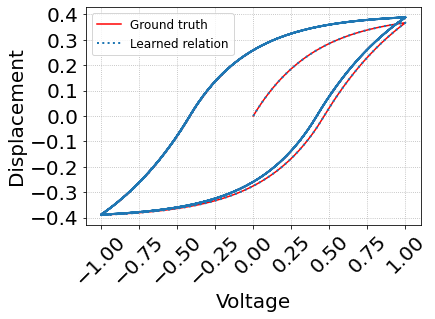

In [20]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
plt.plot(x, y_test, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'Learned relation'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_inputvsOutput.png", dpi = 300, bbox_inches='tight')

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

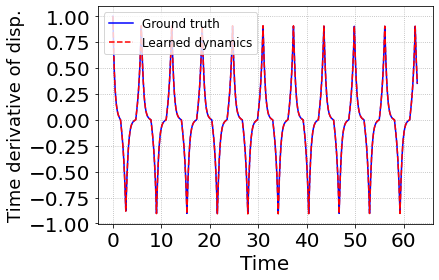

In [21]:
test = c1*t1+c2*t2+c3*t3
plt.plot(t,dy, 'b')
plt.plot(t,test, '--r')
plt.grid(linestyle='dotted')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Time derivative of disp.', fontsize = 18)
plt.legend(['Ground truth' , 'Learned dynamics'], prop={'size': 12})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_Output.jpg", dpi = 300, bbox_inches='tight')

In [22]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test SINDy: ", relative_error_test*100, "%")

Relative Error Test SINDy:  0.0 %


In [23]:
t1=t1.reshape(-1,1)
t2=t2.reshape(-1,1)
t3=t3.reshape(-1,1)
Y = np.concatenate((t1, t2, t3), axis=1)
Y.shape
dy = dy.reshape(-1,1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [25]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 0.98643951 -0.5115245  -1.94002538]]
[8.58801572e-05]


In [26]:
#kkk

In [27]:
c1 = 0.986
c2 = -0.511
c3 = -1.94
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [28]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

In [29]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test Ridge: ", relative_error_test*100, "%")

Relative Error Test Ridge:  0.0010571522795876237 %


In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)

In [31]:
linreg.coef_

array([[ 0.99993107, -0.50004947, -1.99970164]])

In [32]:
linreg.intercept_

array([1.49262494e-06])

In [33]:
#kkk

In [34]:
c1 = 0.99
c2 = -0.5
c3 = -1.999
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [35]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

In [36]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test Lin reg: ", relative_error_test*100, "%")

Relative Error Test Lin reg:  0.009419503761515211 %


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"
# Random Seed for dataset generation
sampling_seed = 78
torch.manual_seed(sampling_seed)

# Number of training samples
n_samples = 10000

x = X_train
y = y_train
y = y.reshape(-1,1)

x = x.astype(np.float32)
y = y.astype(np.float32)

x = torch.from_numpy(x)
y = torch.from_numpy(y)

batch_size = n_samples
training_set = DataLoader(torch.utils.data.TensorDataset(x, y), batch_size=batch_size, shuffle=True)

In [40]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)

def NeuralNet_Seq(input_dimension, output_dimension, n_hidden_layers, neurons):
    modules = list()
    modules.append(nn.Linear(input_dimension, neurons))
    modules.append(nn.Tanh())
    for _ in range(n_hidden_layers):
        modules.append(nn.Linear(neurons, neurons))
        modules.append(nn.Tanh())
    modules.append(nn.Linear(neurons, output_dimension))
    model =  nn.Sequential(*modules)
    return model

  


In [41]:
# Model definition
my_network = NeuralNet(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)
# my_network = NeuralNet_Seq(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)

In [42]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
# Model definition

# Predict network value of x
print(my_network(x))

tensor([[-0.8615],
        [ 0.6235],
        [ 0.8096],
        ...,
        [ 0.7619],
        [-0.4852],
        [ 0.1229]], grad_fn=<AddmmBackward0>)


In [43]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [44]:
def fit(model, training_set, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (x_train_, u_train_) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                u_pred_ = model(x_train_)
                # Item 1. below
                loss = torch.mean((u_pred_.reshape(-1, ) - u_train_.reshape(-1, ))**p)
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [45]:
n_epochs = 1000
history = fit(my_network, training_set, n_epochs, optimizer_, p=2, verbose=True )

################################  0  ################################
Loss:  0.9666993618011475
################################  1  ################################
Loss:  0.9202477335929871
################################  2  ################################
Loss:  0.7406691312789917
################################  3  ################################
Loss:  0.5712133049964905
################################  4  ################################
Loss:  0.4558830261230469
################################  5  ################################
Loss:  0.38598042726516724
################################  6  ################################
Loss:  0.33923614025115967
################################  7  ################################
Loss:  0.3046376407146454
################################  8  ################################
Loss:  0.27740341424942017
################################  9  ################################
Loss:  0.2550617456436157
################################  10 

Loss:  4.614230419974774e-05
################################  84  ################################
Loss:  4.3299489334458485e-05
################################  85  ################################
Loss:  4.091882874490693e-05
################################  86  ################################
Loss:  3.891906817443669e-05
################################  87  ################################
Loss:  3.722693872987293e-05
################################  88  ################################
Loss:  3.578681935323402e-05
################################  89  ################################
Loss:  3.454859324847348e-05
################################  90  ################################
Loss:  3.347365418449044e-05
################################  91  ################################
Loss:  3.252853639423847e-05
################################  92  ################################
Loss:  3.168667899444699e-05
################################  93  ################################

Loss:  4.665560027206084e-06
################################  166  ################################
Loss:  4.57486157756648e-06
################################  167  ################################
Loss:  4.483029442781117e-06
################################  168  ################################
Loss:  4.3951658881269395e-06
################################  169  ################################
Loss:  4.3158925109310076e-06
################################  170  ################################
Loss:  4.2484630284889136e-06
################################  171  ################################
Loss:  4.183677901892224e-06
################################  172  ################################
Loss:  4.122608970646979e-06
################################  173  ################################
Loss:  4.064279437443474e-06
################################  174  ################################
Loss:  4.004665242973715e-06
################################  175  #####################

Loss:  1.4859522252663737e-06
################################  250  ################################
Loss:  1.4630783198299468e-06
################################  251  ################################
Loss:  1.4435781849897467e-06
################################  252  ################################
Loss:  1.426099288437399e-06
################################  253  ################################
Loss:  1.4110669326328207e-06
################################  254  ################################
Loss:  1.397578785145015e-06
################################  255  ################################
Loss:  1.3851918083673809e-06
################################  256  ################################
Loss:  1.3740610711465706e-06
################################  257  ################################
Loss:  1.3639398730447283e-06
################################  258  ################################
Loss:  1.3551662050304003e-06
################################  259  ###############

Loss:  9.37901006636821e-07
################################  331  ################################
Loss:  9.25937058582349e-07
################################  332  ################################
Loss:  9.139987469097832e-07
################################  333  ################################
Loss:  9.002270644486998e-07
################################  334  ################################
Loss:  8.895938208297594e-07
################################  335  ################################
Loss:  8.773643571657885e-07
################################  336  ################################
Loss:  8.650901577311743e-07
################################  337  ################################
Loss:  8.511312330483634e-07
################################  338  ################################
Loss:  8.355664817827346e-07
################################  339  ################################
Loss:  8.19537774532364e-07
################################  340  ##########################

Loss:  5.298028327160864e-07
################################  413  ################################
Loss:  5.297008556226501e-07
################################  414  ################################
Loss:  5.296100198393106e-07
################################  415  ################################
Loss:  5.295288474371773e-07
################################  416  ################################
Loss:  5.294480729389761e-07
################################  417  ################################
Loss:  5.293841240927577e-07
################################  418  ################################
Loss:  5.293160825203813e-07
################################  419  ################################
Loss:  5.292652645039198e-07
################################  420  ################################
Loss:  5.292056926009536e-07
################################  421  ################################
Loss:  5.291493607728626e-07
################################  422  #######################

Loss:  5.272239036457904e-07
################################  496  ################################
Loss:  5.272050884741475e-07
################################  497  ################################
Loss:  5.271858753985725e-07
################################  498  ################################
Loss:  5.271623422231642e-07
################################  499  ################################
Loss:  5.27150973539392e-07
################################  500  ################################
Loss:  5.271315330901416e-07
################################  501  ################################
Loss:  5.271135705697816e-07
################################  502  ################################
Loss:  5.270923111311276e-07
################################  503  ################################
Loss:  5.270753149488883e-07
################################  504  ################################
Loss:  5.270567271509208e-07
################################  505  ########################

Loss:  5.259320232653408e-07
################################  578  ################################
Loss:  5.259195177131915e-07
################################  579  ################################
Loss:  5.258984288047941e-07
################################  580  ################################
Loss:  5.258877990854671e-07
################################  581  ################################
Loss:  5.258730197965633e-07
################################  582  ################################
Loss:  5.258634132587758e-07
################################  583  ################################
Loss:  5.25850282429019e-07
################################  584  ################################
Loss:  5.258351052361832e-07
################################  585  ################################
Loss:  5.258235660221544e-07
################################  586  ################################
Loss:  5.258041824163229e-07
################################  587  ########################

Loss:  5.249399350759631e-07
################################  660  ################################
Loss:  5.249319769973226e-07
################################  661  ################################
Loss:  5.24922029399022e-07
################################  662  ################################
Loss:  5.249114565231139e-07
################################  663  ################################
Loss:  5.248994625617343e-07
################################  664  ################################
Loss:  5.248900265542034e-07
################################  665  ################################
Loss:  5.248758156994882e-07
################################  666  ################################
Loss:  5.248714387562359e-07
################################  667  ################################
Loss:  5.248551815384417e-07
################################  668  ################################
Loss:  5.248451770967222e-07
################################  669  ########################

Loss:  5.241279268375365e-07
################################  743  ################################
Loss:  5.241107032816217e-07
################################  744  ################################
Loss:  5.241076905804221e-07
################################  745  ################################
Loss:  5.240885911916848e-07
################################  746  ################################
Loss:  5.24084043718176e-07
################################  747  ################################
Loss:  5.24075062457996e-07
################################  748  ################################
Loss:  5.240682980911515e-07
################################  749  ################################
Loss:  5.240557356955833e-07
################################  750  ################################
Loss:  5.240490850155766e-07
################################  751  ################################
Loss:  5.240389668870193e-07
################################  752  #########################

Loss:  5.234100513007434e-07
################################  825  ################################
Loss:  5.234027753431292e-07
################################  826  ################################
Loss:  5.233980573393637e-07
################################  827  ################################
Loss:  5.233900424173044e-07
################################  828  ################################
Loss:  5.233788442637888e-07
################################  829  ################################
Loss:  5.233692377260013e-07
################################  830  ################################
Loss:  5.23359574344795e-07
################################  831  ################################
Loss:  5.233557089923124e-07
################################  832  ################################
Loss:  5.233537194726523e-07
################################  833  ################################
Loss:  5.233411002336652e-07
################################  834  ########################

Loss:  5.22766583799239e-07
################################  907  ################################
Loss:  5.227620363257302e-07
################################  908  ################################
Loss:  5.227498718340939e-07
################################  909  ################################
Loss:  5.227443011790456e-07
################################  910  ################################
Loss:  5.227373662819446e-07
################################  911  ################################
Loss:  5.227267934060364e-07
################################  912  ################################
Loss:  5.227166752774792e-07
################################  913  ################################
Loss:  5.227127530815778e-07
################################  914  ################################
Loss:  5.227095130067028e-07
################################  915  ################################
Loss:  5.227032033872092e-07
################################  916  ########################

Loss:  5.221677383815404e-07
################################  990  ################################
Loss:  5.221598939897376e-07
################################  991  ################################
Loss:  5.221457968218601e-07
################################  992  ################################
Loss:  5.221478431849391e-07
################################  993  ################################
Loss:  5.221390324550157e-07
################################  994  ################################
Loss:  5.22127493240987e-07
################################  995  ################################
Loss:  5.221227752372215e-07
################################  996  ################################
Loss:  5.221107812758419e-07
################################  997  ################################
Loss:  5.221117476139625e-07
################################  998  ################################
Loss:  5.221006631472846e-07
################################  999  ########################

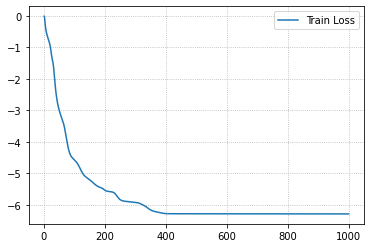

In [46]:
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1,n_epochs+1), np.log10(history), label="Train Loss")
plt.legend()

In [47]:
X_test = X_test.astype(np.float32)
X_test = torch.from_numpy(X_test)

y_test = y_test.astype(np.float32)
y_test = torch.from_numpy(y_test)

y_test_pred = my_network(X_test).reshape(-1,1)

In [48]:
y_test = y_test.reshape(-1,1)

In [49]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((y_test_pred - y_test)**2)/torch.mean(y_test**2)
print("Relative Error Test DNN: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test DNN:  0.00039245969674084336 %


In [50]:
y_test_pred.shape

torch.Size([2500, 1])

In [51]:
y_test.shape

torch.Size([2500, 1])